In [2]:
# Перед началом работы с библиотеками pandas и seaborn необходимо установить их в Python.
# Сделать это можно, исполнив данную ячейку
!pip3 install pandas
!pip3 install seaborn

In [3]:
import math

import pandas as pd
import seaborn as sns

In [4]:
# Настройка, которая позволяет сделать графики, которые рисует seaborn, более крупными
sns.set(rc={'figure.figsize': (11.7, 8.27)})

In [5]:
def round_to_2(x):
    """
    Принимает число и возвращает результат его округления
    до 2 знаков после запятой.
    
    Аргументы:
        x: Число.
        
    Возвращаемое значение:
        Результат округления числа до 2 знаков после запятой.
    """
    
    return round(x, 2)

## Среднее значение в колонке csv-файла

In [6]:
def split_line(line, sep):
    """
    Возвращает список значений, которые содержатся в строке
    и разделены конкретным разделителем.
    Если какое-то из значений обособлено кавычками ("<значение>"), то разделительный
    символ внутри него не считается разделителем.
    
    Например, если передать в функцию строку 'aa,bb,"cc, oo",dd' и разделитель ',',
    то в результате работы функции получится список ['aa', 'bb', 'cc, oo', 'dd'].
    
    Аргументы:
        line: Строка, которую нужно разбить на подстроки.
        sep: Разделитель, который используется в строке для отделения различных значений.
        
    Возвращаемое значение:
        Список подстрок строки, получаемых с помощью разделения её
        на подстроки по заданному разделителю.
    """
    
    res = []
    
    prev_ind = -1
    in_quotes = False
    
    for i in range(len(line)):
        ch = line[i]
        
        if ch == '"':
            in_quotes = not in_quotes
            
        if not in_quotes and ch == sep:
            res.append(line[prev_ind + 1:i].strip('"'))
            prev_ind = i
            
    if prev_ind < len(line) - 1:
        res.append(line[prev_ind + 1:len(line)].strip('"'))
    elif prev_ind == len(line) - 1:
        res.append('')
    
    return res

In [7]:
def read_csv_and_calc_mean_solution(lines, sep, column_name):
    """
    Принимает список строк из csv-файла и возвращает среднее значение в заданной колонке.
    В первой строке csv-файла всегда представлены названия его колонок.
    
    Аргументы:
        lines: Список строк, прочитанных из csv-файла.
        sep: Разделитель, который используется в строках для отделения различных значений.
        column_name: Название колонки с целочисленными значениями, по которой нужно посчитать среднее.
        
    Возвращаемое значение:
        Среднее значение в заданной колонке, округлённое до 2 знаков
        после запятой с помощью функции round_to_2.
    """
    
    index_column_name = split_line(lines[0], sep).index(column_name)
    sum1 = 0
    count = len(lines) - 1

    for i, e in enumerate(lines):
        if i > 0:
            sum1 += float(split_line(e, sep)[index_column_name])
    
    return round_to_2(sum1 / count)


In [8]:
def read_csv_and_calc_mean_tests():
    example_1_lines = [
        'Жанр,"Продолжительность, часы","Продолжительность, минуты",Страна производства,Год производства',
        'Боевик,0,36,Италия,1996',
        'Комедия,1,23,Россия,1999',
        'Триллер,2,21,США,2006',
    ]
    example_1_sep = ','
    example_1_column = 'Год производства'
    example_1_res = 2000.33
    
    assert read_csv_and_calc_mean_solution(example_1_lines, example_1_sep, example_1_column) == example_1_res
    
    example_2_lines = [
        'Жанр,"Продолжительность, часы","Продолжительность, минуты",Страна производства,Год производства',
        'Боевик,0,36,Италия,1996',
        'Комедия,1,23,Россия,1999',
        'Триллер,2,21,США,2006',
        'Комедия,1,48,США-Россия,2012',
        'Драма,2,3,Франция,2016',
        'Документальный,2,47,Германия,2001'
    ]
    example_2_sep = ','
    example_2_column = 'Продолжительность, минуты'
    example_2_res = 29.67
    
    assert read_csv_and_calc_mean_solution(example_2_lines, example_2_sep, example_2_column) == example_2_res
    
    print('Все тесты прошли успешно!')

In [9]:
read_csv_and_calc_mean_tests()

Все тесты прошли успешно!


## Фильтрация таблиц

In [27]:
# В переменную movies загружена таблица из файла movies_data.csv
movies = pd.read_csv('movies_data.csv', sep=',')

french_dramas = movies[
    (movies["Жанр фильма"] == "Драма") & 
    (movies['Страна производства'] == "Франция")
    ]

# russian_films_after_2010_year = movies[(movies["Страна производства"] == "Россия") & \
#                 (movies["Год производства"] > 2010)]

russian_trillers_before_2000_year = movies[
    (movies["Страна производства"] == "Россия") | 
    (
        (movies["Год производства"] < 2000) & 
        (movies["Жанр фильма"] == "Триллер")
    )
]
(russian_trillers_before_2000_year)

# french_dramas
# russian_films_after_2010_year
# print(len(french_dramas))
# print(len(russian_films_after_2010_year))
# print(len(russian_trillers_before_2000_year))

,Жанр фильма,"Продолжительность, часы","Продолжительность, минуты",Страна производства,Год производства
7,Документальный,нет данных,46,Россия,2006.0
8,Триллер,1,0,США,1999.0
11,Триллер,нет данных,37,Россия,2009.0
18,Драма,1,7,Россия,2009.0
19,Триллер,1,0,Россия,2011.0
...,...,...,...,...,...
9981,Боевик,нет данных,28,Россия,2011.0
9987,Драма,1,40,Россия,2001.0
9990,Драма,нет данных,52,Россия,2017.0
9993,Драма,1,49,Россия,2010.0


## Комбинирование колонок и расчёт статистик

In [11]:
# В переменную movies_budget загружена таблица из файла movies_budget.csv
movies_budget = pd.read_csv('movies_budget.csv', sep=';')

income = movies_budget['Стоимость билета'] * movies_budget["Число зрителей"]
print(round_to_2(income.mean()))

profit = income * 0.5 - movies_budget["Бюджет"] - movies_budget["Бюджет"] * 0.5
print(round_to_2(profit.max()))

67278893.76
150431902.0


## Агрегированные статистики

In [12]:
# В переменную movies_budget загружена таблица из файла movies_budget.csv
movies_budget = pd.read_csv('movies_budget.csv', sep=';')

In [13]:
def transform_views_data(movies_data):
    new_movies_data = movies_data.groupby('Жанр фильма', as_index=False) \
      .aggregate({'Число зрителей': 'sum'}) \
      .sort_values('Число зрителей', ascending=False)
    
    return new_movies_data

print(transform_views_data(movies_budget))

      Жанр фильма  Число зрителей
2           Драма       144536483
4         Триллер        30519114
0          Боевик        20859969
1  Документальный        10093471
3         Комедия         9920914


In [14]:
def transform_countries_info(movies_data):
    """
    Принимает таблицу с колонкой «Страна производства» и добавляет к таблице 5 новых колонок:
    по одной на каждую отдельную страну. Значение в каждой из колонок соответствует тому,
    принимала ли конкретная страна участие в производстве фильма.
    
    Аргументы:
        movies_data: Исходная таблица с клонкой «Страна производства».
        
    Возвращаемое значение:
        Нет. Функция модифицирует переданную таблицу, но ничего не возвращает.
    """
    
    # countries = ['Россия', 'Германия', 'США', 'Италия', 'Франция']
    countries = ['Россия']
    new_columns = [[] for i in range(len(countries))]
    
    for _, row in movies_data.iterrows():
        country_of_origin_united = row['Страна производства']
        countries_of_origin = country_of_origin_united.split('-')
        
        for i in range(len(countries)):
            country = countries[i]
            
            if country in countries_of_origin:
                new_columns[i].append(1)
            else:
                new_columns[i].append(0)
                
    for i in range(len(countries)):
        movies_data[countries[i]] = new_columns[i]

new_data = movies_budget
transform_countries_info(new_data)
new_data = new_data.groupby('Жанр фильма', as_index=False) \
    .aggregate({'Россия': 'sum'}) \
    .sort_values('Россия', ascending=False)

new_data

,Жанр фильма,Россия
2,Драма,123
4,Триллер,111
0,Боевик,77
1,Документальный,40
3,Комедия,33


## Визуальный анализ данных

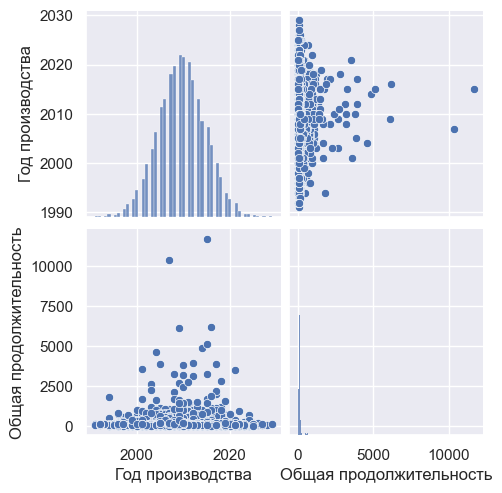

In [15]:
# В переменную many_factors загружена таблица из файла many_factors_data.csv
# many_factors = pd.read_csv('many_factors_data.csv')
movies_data = pd.read_csv('./movies_data.csv', sep=',')
movies_data["Продолжительность, часы"] = movies_data["Продолжительность, часы"].replace('нет данных', '0')
movies_data["Общая продолжительность"] = \
    movies_data["Продолжительность, часы"].astype('int') * 60 + movies_data["Продолжительность, минуты"].astype('int')

sns.pairplot(movies_data[['Год производства', 'Общая продолжительность']])

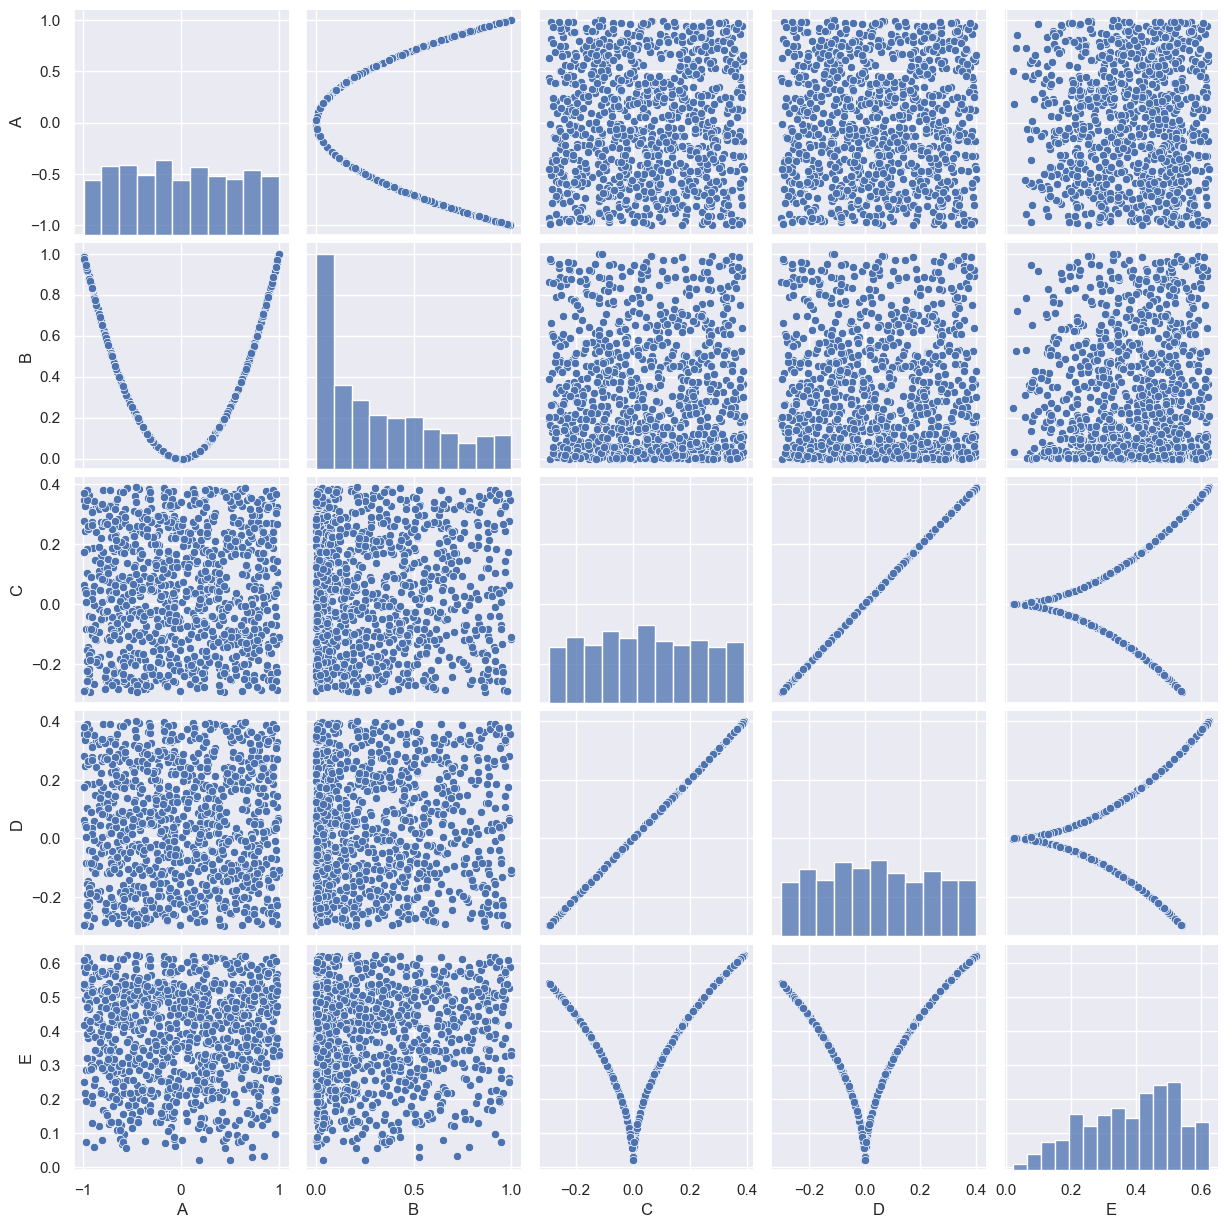

In [27]:
# В переменную many_factors загружена таблица из файла many_factors_data.csv
many_factors = pd.read_csv('many_factors_data.csv')
sns.pairplot(many_factors[["A", "B", "C", "D", "E"]])

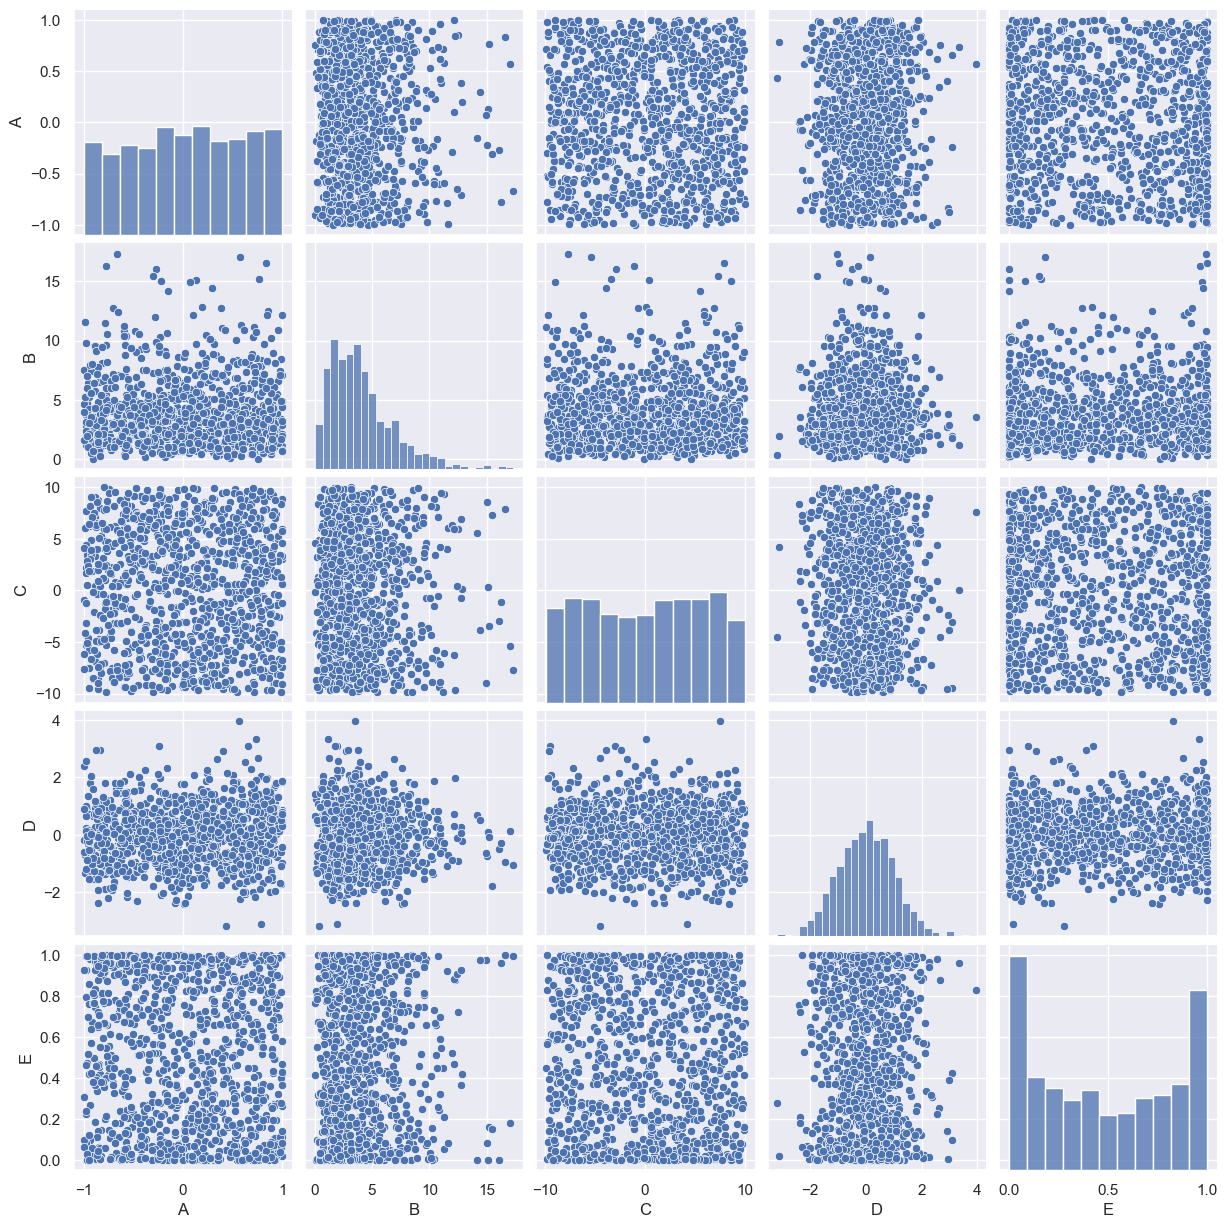

In [30]:
# В переменную uniform_and_not загружена таблица из файла uniform_and_not_data
uniform_and_not = pd.read_csv('uniform_and_not_data.csv')
sns.pairplot(uniform_and_not[["A", "B", "C", "D", "E"]])